## Код с урока

In [7]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import GlobalMaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
from keras import models, layers
import keras

**Загрузка данных**

In [6]:
# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

**Построение модели**

In [8]:
# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))

In [9]:
# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

In [10]:
hist = model.fit(x=x_train,y=y_train, epochs=1, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 112us/step
Test loss 0.3451, accuracy 90.36%


### Cifar 10

In [11]:
from __future__ import print_function
import keras # расскоментируйте эту строку, чтобы начать обучение
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [12]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [13]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

170500096/170498071 [==============================] - 19s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [14]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [16]:
# компиляция модели


In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Использование data augmentation в реальном времени
Epoch 1/1
1563/1563 [==============================] - 124s 79ms/step - loss: 1.8440 - accuracy: 0.3234 - val_loss: 1.5583 - val_accuracy: 0.4375


In [19]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

сохранить обученную модель как /Users/ian/GeekBrains/NN_introduction/lesson4/saved_models/keras_cifar10_trained_model.h5 


In [20]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 3s 306us/step
Test loss: 1.5582619928359986
Test accuracy: 0.4375


## Анализ

In [69]:
from sklearn.model_selection import ParameterGrid
from collections import namedtuple
import matplotlib.pyplot as plt
import time
import textwrap

In [41]:
conv2d_layer = namedtuple('Conv2D', ['num_of_layers', 'filter', 'kernel_size'])

In [154]:
def create_nn(x_train, y_train, x_test, y_test, 
              conv2d_layers=[conv2d_layer(1, 32, 3), conv2d_layer(2, 64, 3)],
              dense_layers=[512],
              pool_size=2,
              dropout=0.25,
              learning_rate=0.0001,
              data_augmentation=True,
              n_epochs=2, 
              verbose=0):
    
    model = keras.Sequential()
    
    model.add(Conv2D(conv2d_layers[0].filter, conv2d_layers[0].kernel_size, padding='same', 
              input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    
    for layer in conv2d_layers:
        for _ in range(layer.num_of_layers):
            model.add(Conv2D(layer.filter, layer.kernel_size))
            model.add(Activation('relu'))
        if pool_size > 1:
            model.add(MaxPooling2D(pool_size=pool_size))
        if dropout:
            model.add(Dropout(dropout))
    
    model.add(Flatten())
    
    for num_of_neurons in dense_layers:
        model.add(Dense(num_of_neurons))
        model.add(Activation('relu'))
    
    model.add(Dropout(2*dropout))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # инициализация RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=learning_rate, decay=1e-6)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    
    if not data_augmentation:
#         print('Не используется data augmentation')
        model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=n_epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True,
                  verbose=verbose)
    else:
#         print('Использование data augmentation в реальном времени')
        # Препроцессинг и data augmentation в реальном времени:
        datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False, 
            zca_epsilon=1e-06, 
            rotation_range=0, 
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0., 
            zoom_range=0., 
            channel_shift_range=0.,
            fill_mode='nearest',
            cval=0.,
            horizontal_flip=True,
            vertical_flip=False,
            rescale=None,
            preprocessing_function=None,
            data_format=None,
            validation_split=0.0)

        # запуск data augmentation через fit_generator
        model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_size),
                            epochs=n_epochs,
                            validation_data=(x_test, y_test),
                            workers=4,
                            verbose=verbose)
    
    return model

In [138]:
def evaluate_and_plot_results(x_train, y_train, x_test, y_test, params_list):
    for element in params_list:
        grid = ParameterGrid(element)
        accuracy_list = []
        time_list = []
        for param in grid:
            start = time.time()
            model = create_nn(x_train, y_train, x_test, y_test, **param)
            end = time.time()
            accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
            accuracy_list.append(accuracy)
            time_list.append(end - start)
        
        to_print_acc = [float('{:.3f}'.format(x)) for x in accuracy_list]
        to_print_time = [float('{:.3f}'.format(x)) for x in time_list]
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 14))
        labels = [str(ele) for ele in list(element.values())[0]]
        len_labels = len(labels)
        labels = [textwrap.fill(text,25) for text in labels]
        ax1.barh(labels, accuracy_list, color='cornflowerblue')
        ax2.barh(labels, time_list, color='cornflowerblue')
        
        for i, v in enumerate(accuracy_list):
            if v == max(accuracy_list):
                ax1.text(v-v/2, 
                         i-len(accuracy_list)/80, 
                         to_print_acc[i], 
                         color='green', 
                         fontweight='bold', 
                         fontsize=18)
            elif v == min(accuracy_list):
                ax1.text(v-v/2, 
                         i-len(accuracy_list)/80, 
                         to_print_acc[i], 
                         color='red', 
                         fontweight='bold', 
                         fontsize=18)
            else:
                ax1.text(v-v/2, 
                         i-len(accuracy_list)/80, 
                         to_print_acc[i], 
                         color='black', 
                         fontweight='bold', 
                         fontsize=18)
        for i, v in enumerate(time_list):
            if v == max(time_list):
                ax2.text(v/2, i-len(time_list)/80, to_print_time[i], color='red', fontweight='bold', fontsize=18)
            elif v == min(time_list):
                ax2.text(v/2, i-len(time_list)/80, to_print_time[i], color='green', fontweight='bold', fontsize=18)
            else:
                ax2.text(v/2, i-len(time_list)/80, to_print_time[i], color='black', fontweight='bold', fontsize=18)

        ax1.set_xlabel('Точность')
        ax2.set_xlabel('Время обучения')
        ax1.grid(True)
        ax2.grid(True)
        plt.yticks(range(len_labels), labels)
        plt.show()
        print('_' * 100)

In [139]:
params_list = [{'conv2d_layers': [[conv2d_layer(1, 32, 3)],
                                  [conv2d_layer(1, 64, 3)],
                                  [conv2d_layer(1, 32, 3), conv2d_layer(2, 64, 3)],
                                  [conv2d_layer(1, 32, 4), conv2d_layer(2, 64, 4)],
                                  [conv2d_layer(2, 32, 3), conv2d_layer(3, 64, 3)],
                                  [conv2d_layer(1, 32, 2), conv2d_layer(2, 64, 2)],
                                  [conv2d_layer(1, 64, 3), conv2d_layer(2, 32, 3)],
                                  [conv2d_layer(1, 64, 2), conv2d_layer(2, 32, 2)]]},
              {'dense_layers': [[512], [512, 256], [512, 256, 128]]},
              {'pool_size': [1, 2, 3]},
              {'dropout': [0.1, 0.15, 0.2, 0.25]},
              {'learning_rate': [0.0001, 0.001, 0.01, 0.1]},
              {'data_augmentation': [True, False]},
              {'n_epochs': [1, 2, 3, 5]}]

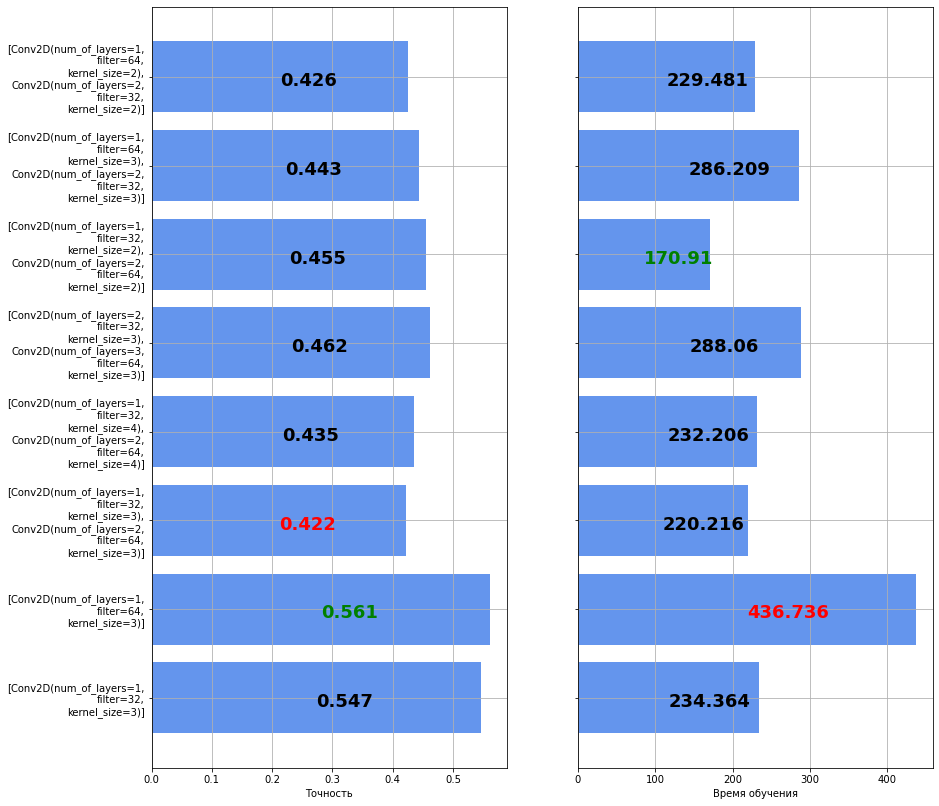

____________________________________________________________________________________________________


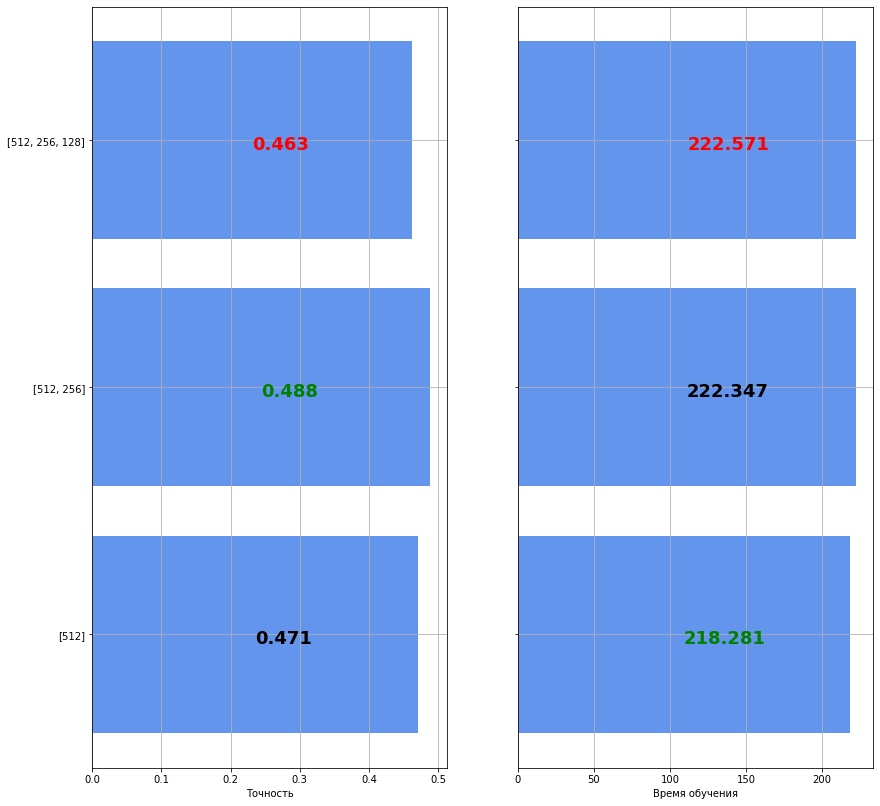

____________________________________________________________________________________________________


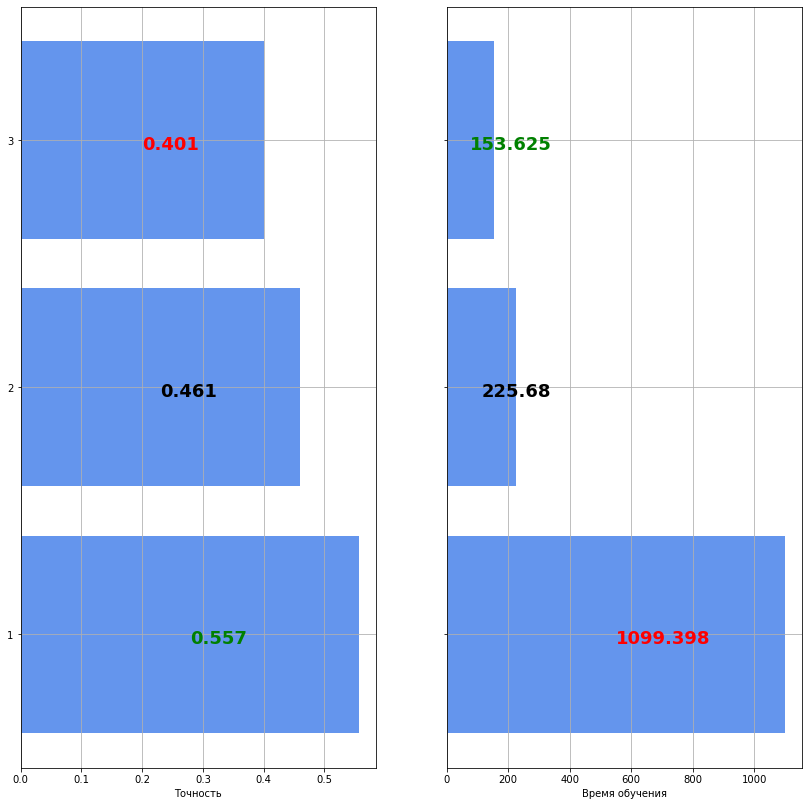

____________________________________________________________________________________________________


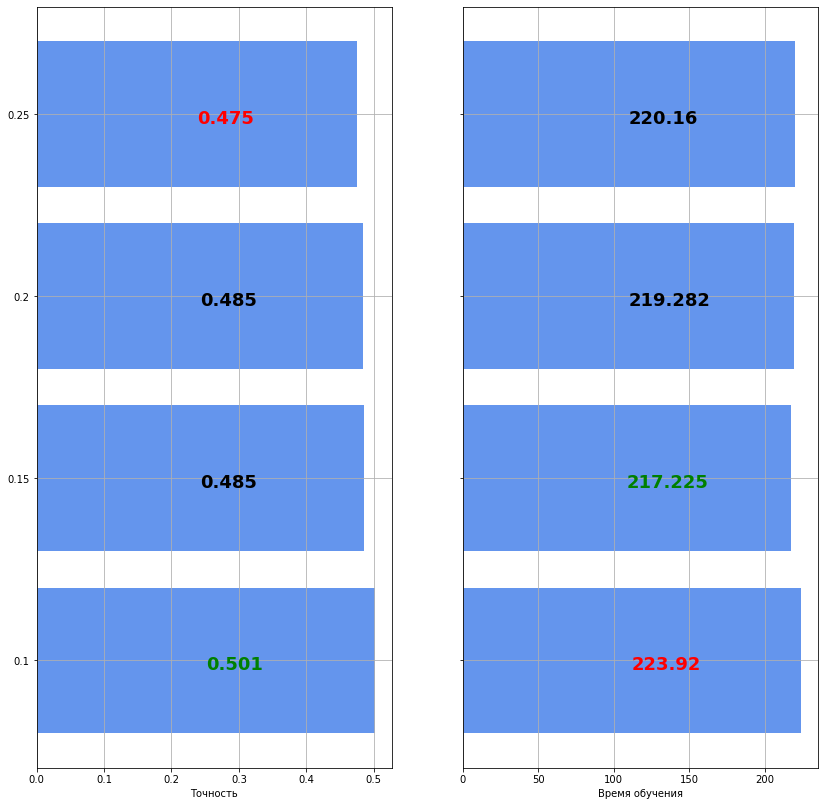

____________________________________________________________________________________________________


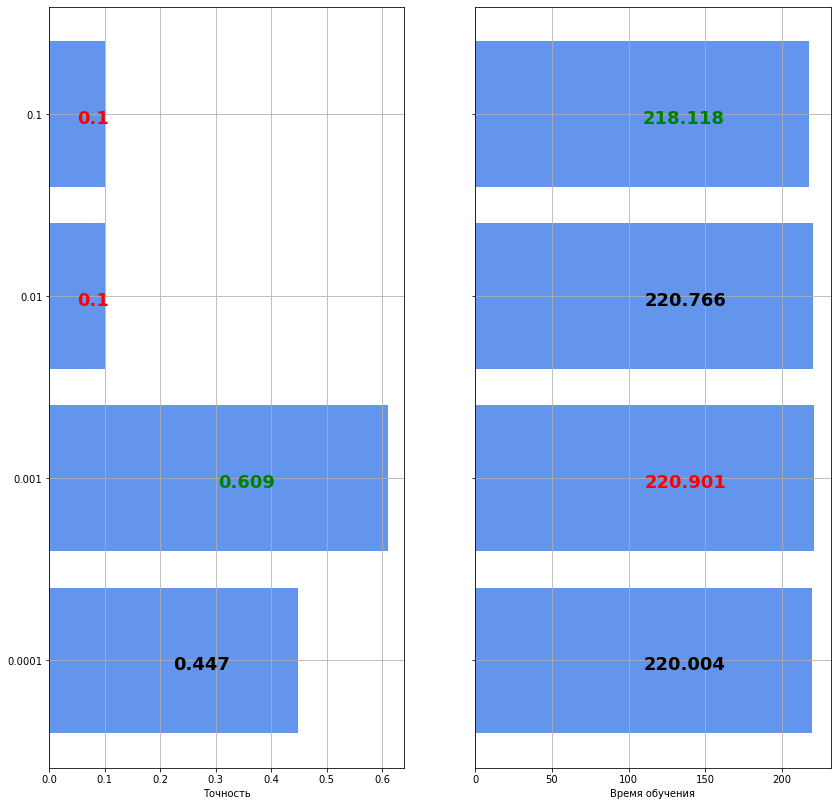

____________________________________________________________________________________________________


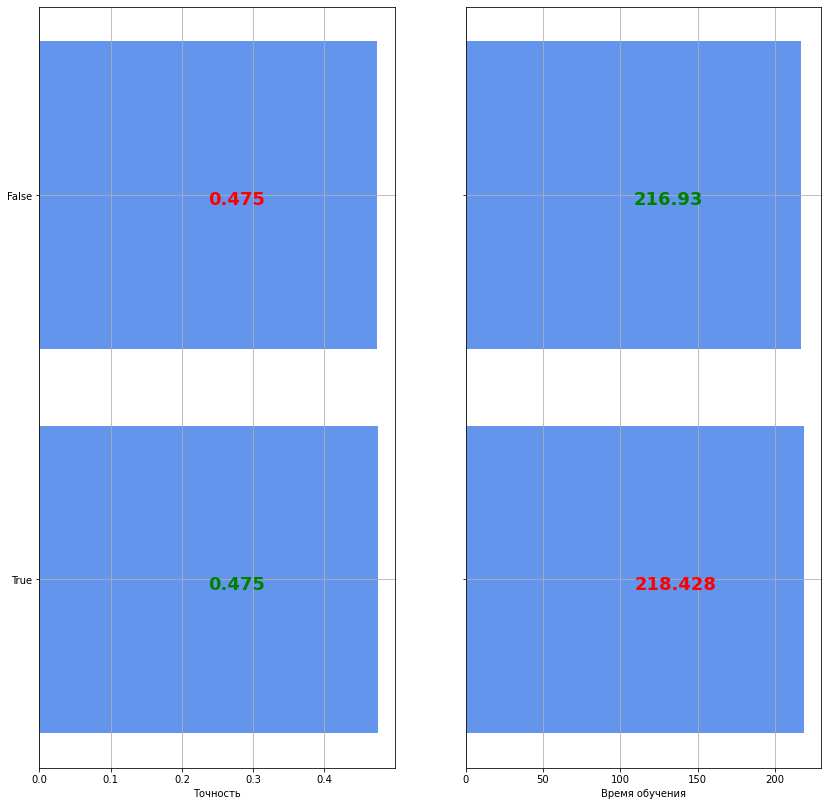

____________________________________________________________________________________________________


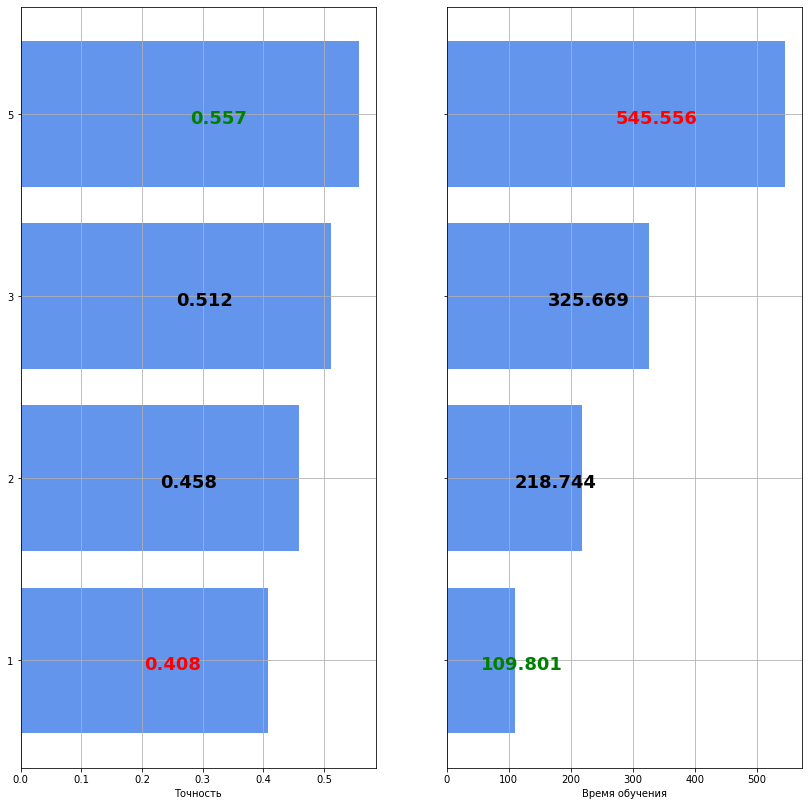

____________________________________________________________________________________________________


In [140]:
evaluate_and_plot_results(x_train, y_train, x_test, y_test, params_list)

**модель с лучшими параметрами**

In [149]:
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = True

In [156]:
best_model = create_nn(x_train, y_train, x_test, y_test, 
                       conv2d_layers=[conv2d_layer(1, 64, 3)],
                       dense_layers=[512, 256],
                       pool_size=1,
                       dropout=0.1,
                       learning_rate=0.001,
                       data_augmentation=True,
                       n_epochs=5, 
                       verbose=1)

Epoch 1/5
1563/1563 [==============================] - 610s 390ms/step - loss: 1.5959 - accuracy: 0.4345 - val_loss: 1.2516 - val_accuracy: 0.5639
Epoch 2/5
1563/1563 [==============================] - 611s 391ms/step - loss: 1.2740 - accuracy: 0.5580 - val_loss: 1.0456 - val_accuracy: 0.6406
Epoch 3/5
1563/1563 [==============================] - 607s 389ms/step - loss: 1.2197 - accuracy: 0.5849 - val_loss: 1.0962 - val_accuracy: 0.6323
Epoch 4/5
1563/1563 [==============================] - 613s 392ms/step - loss: 1.2323 - accuracy: 0.5870 - val_loss: 1.0326 - val_accuracy: 0.6406
Epoch 5/5
1563/1563 [==============================] - 598s 383ms/step - loss: 1.2195 - accuracy: 0.5902 - val_loss: 1.2004 - val_accuracy: 0.6345


In [158]:
# проверка работы обученной модели
scores = best_model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 7s 678us/step

Test loss: 1.2003686084747314
Test accuracy: 0.6345000267028809


### Выводы и комментарии

Немного о построении моделей:  
При проверке сверточных слоев слои добавлялись блоками, как было сделано на уроке (2 слоя с 32 выходами и 2 слоя с 64 - это и была конфигурация по умолчанию при проверке других параметров). Пробовал убирать один из блоков, менять их местами, менять размер кластера.   
По умолчанию, количество эпох обучения стояло 2, так как с 1 эпохой показалось, что результаты сильно зависят от начального случайного приближения.
Также дополнительно пробовал менять размер макспулинга или убирать его совсем, менять количество отсеченных связей, количество полносвязных слоев, скорость обучения, наличие или отсутствие дата аугментации

* Лучшей по структуре в сверточных слоях оказалась модель с двумя сверточными слоями с фильтром 64 и kernel size (3, 3): (Conv2D(64, (3, 3)) -> Activation('relu') -> Conv2D(64, (3, 3)) -> Activation('relu')
* Она же оказалась самой затратной по ресурсам. Сетис. большим количеством слоев свертки тратили значительно меньше времени на обучение. Затрудняюсь сказать с чем это связано, интересны комментарии
* Лучшей из проверенных по структуре в полносвязных слоях оказалась сеть с 2 скрытыми слоями до выходного с 512 и 256 нейронами в каждом слое. Третий слой не дал прибавки, видимо сказалось переобучение.
* Макспуллинг сокращает время обучения, но при этом ухудшает качество модели. Мое предположение, что это связано с тем, что изображения и так имеют достаточно низкое качество и, соответственно, отбрасываемые макспуллингом "шумы" захватывают часть полезной информации
* Лучший learning rate оказался 0.001.Это уникальный параметр, для каждой задачи, сложно дать какие-либо комментарии
* Судя по графику аугментация в данном случае практически не влияет на точность (по крайней мере в 3 знаках после запятой различий нет). Видимо, недостатка тренировочных данных в данном датасете не наблюдается.
* От количества эпох обучения напрямую зависит точность модели: чем больше - тем лучше (до того как мы начнем переобучаться)

**О модификациях**

Для того, чтобы нейросеть была применима для других датасетов необходимо:
* Для CIFAR100 изменить количество выходных нейронов с 10 до 100
* Для MNIST необходимо поменять размерость входных данных в первом слое
* ImageNet - необходима предобработка данных для приведения изображений к одному формату и модификации во входных и выходных слоях.
  
* Также, думаю, необходимо вносить изменения во внутренние слои для улучшения результатов, но это не должно повлиять на саму возможность работы с датасетами

**Вопросы**

1. Как отметил выше, не совсем понял, почему при увеличении количества сверточных слоев, не увеличивается пропорционально время обучения. Единственная моя догадка, это то, что свертка сама по себе занимает немного времени, и при большем количестве сверточных слоев, мы передаем на полносвязные слои более общие признаки, которых относительно немного. То есть меньше свертки - больше размерность признаков на котором обучаются полносвязные слои.
2. Не получилось уловить связь между параметрами kernel_size и pool_size: в ходе подготовки задания, заметил, что не при всех сочетаниях этих параметров программа вообще работает. Иногда они конфликтуют. Понимаю, что это как-то связано с размерами матриц которые переходят со слоя на слой, но не до конца понимаю, как именно.